<a href="https://colab.research.google.com/github/Arup-1234/Credit-Scoring-Model/blob/main/Credit_Scoring_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CREDIT SCORING MODEL**

In [ ]:
#@title Imports & Data Loading – Bring in Python libraries and load your dataset.

In [ ]:
# 1. Imports & Data Loading
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import joblib

In [ ]:
# Load your dataset (replace with your path/filename)
credit_data= pd.read_csv(r'/content/credit_scoring.csv')
credit_data

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan
...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,Male,Divorced,High School,Employed,0.74,1285.0,8,3530000,12.99,48,Auto Loan
996,64,Male,Divorced,Bachelor,Unemployed,0.77,1857.0,2,1377000,18.02,60,Home Loan
997,63,Female,Single,Master,Self-Employed,0.18,2628.0,10,2443000,18.95,12,Personal Loan
998,51,Female,Married,PhD,Self-Employed,0.32,1142.0,3,1301000,1.80,24,Auto Loan


In [ ]:
#@title  Exploratory Data Analysis (EDA) – quick checks
credit_data.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan


In [ ]:
credit_data.isnull().sum()

,0
Age,0
Gender,0
Marital Status,0
Education Level,0
Employment Status,0
Credit Utilization Ratio,0
Payment History,0
Number of Credit Accounts,0
Loan Amount,0
Interest Rate,0


In [ ]:
print(credit_data.head())
print(credit_data.info())
print(credit_data.isnull().sum())

   Age  Gender Marital Status Education Level Employment Status  \
0   60    Male        Married          Master          Employed   
1   25    Male        Married     High School        Unemployed   
2   30  Female         Single          Master          Employed   
3   58  Female        Married             PhD        Unemployed   
4   32    Male        Married        Bachelor     Self-Employed   

   Credit Utilization Ratio  Payment History  Number of Credit Accounts  \
0                      0.22           2685.0                          2   
1                      0.20           2371.0                          9   
2                      0.22           2771.0                          6   
3                      0.12           1371.0                          2   
4                      0.99            828.0                          2   

   Loan Amount  Interest Rate  Loan Term   Type of Loan  
0      4675000           2.65         48  Personal Loan  
1      3619000           5.19 

**Reasoning**:
Examine the columns of the `credit_data` DataFrame to identify a column that indicates creditworthiness or a credit score. Since there is no explicit target variable, I will create one based on 'Credit Utilization Ratio' and 'Payment History'. A lower credit utilization ratio and higher payment history indicate better creditworthiness. I will define creditworthy as having a Credit Utilization Ratio less than 0.5 and Payment History greater than the median.



In [ ]:
print(credit_data.columns)

median_payment_history = credit_data['Payment History'].median()
credit_data['Creditworthy'] = ((credit_data['Credit Utilization Ratio'] < 0.5) & (credit_data['Payment History'] > median_payment_history)).astype(int)
print(credit_data[['Credit Utilization Ratio', 'Payment History', 'Creditworthy']].head())

Index(['Age', 'Gender', 'Marital Status', 'Education Level',
       'Employment Status', 'Credit Utilization Ratio', 'Payment History',
       'Number of Credit Accounts', 'Loan Amount', 'Interest Rate',
       'Loan Term', 'Type of Loan'],
      dtype='object')
   Credit Utilization Ratio  Payment History  Creditworthy
0                      0.22           2685.0             1
1                      0.20           2371.0             1
2                      0.22           2771.0             1
3                      0.12           1371.0             0
4                      0.99            828.0             0


## **Define features & target**



**Reasoning**:
The previous code failed because the target column was not correctly specified. Based on the previous subtask, the target column is 'Creditworthy'. This code block will correctly set the target column and split the data into features (X) and target (y).



In [ ]:
target_column = 'Creditworthy'
X = credit_data.drop(columns=[target_column])
y = credit_data[target_column]

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (1000, 12)
Target (y) shape: (1000,)


## **Data preprocessing**




**Reasoning**:
Identify categorical and numerical columns, apply one-hot encoding to categorical columns, scale numerical columns, and combine them.



In [ ]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

display(X_encoded.head())

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Gender_Male,Marital Status_Married,Marital Status_Single,Education Level_High School,Education Level_Master,Education Level_PhD,Employment Status_Self-Employed,Employment Status_Unemployed,Type of Loan_Home Loan,Type of Loan_Personal Loan
0,1.304512,-0.996696,1.489010,-1.220940,1.589493,-1.467519,0.623840,True,True,False,False,True,False,False,False,False,True
1,-1.334979,-1.065446,1.109563,1.166373,0.827783,-1.003704,1.312405,True,True,False,True,False,False,False,True,False,False
2,-0.957909,-0.996696,1.592935,0.143239,-1.092363,-1.447433,-1.441855,False,False,True,False,True,False,False,False,False,False
3,1.153684,-1.340444,-0.098866,-1.220940,1.629887,-0.751710,1.312405,False,True,False,False,False,True,False,True,False,False
4,-0.807081,1.650160,-0.755044,-1.220940,0.589748,-0.804665,-0.064725,True,True,False,False,False,False,True,False,False,True


## **Split data**



**Reasoning**:
Split the preprocessed data into training and testing sets.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 17)
X_test shape: (200, 17)
y_train shape: (800,)
y_test shape: (200,)


## **Model selection & training**



**Reasoning**:
Train a Logistic Regression model using the training data.



In [ ]:
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

**Reasoning**:
Train a Decision Tree Classifier model using the training data.



In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Reasoning**:
Train a Random Forest Classifier model using the training data.



In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## **Model evaluation**


Evaluate the trained model using appropriate metrics (e.g., precision, recall, F1-score, ROC-AUC).


**Reasoning**:
Make predictions and calculate evaluation metrics for each trained model.



In [ ]:
# Make predictions
y_pred_lr = log_reg_model.predict(X_test)
y_proba_lr = log_reg_model.predict_proba(X_test)[:, 1]

y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
metrics = {
    'Logistic Regression': {
        'Precision': precision_score(y_test, y_pred_lr),
        'Recall': recall_score(y_test, y_pred_lr),
        'F1-score': f1_score(y_test, y_pred_lr),
        'ROC-AUC': roc_auc_score(y_test, y_proba_lr)
    },
    'Decision Tree': {
        'Precision': precision_score(y_test, y_pred_dt),
        'Recall': recall_score(y_test, y_pred_dt),
        'F1-score': f1_score(y_test, y_pred_dt),
        'ROC-AUC': roc_auc_score(y_test, y_proba_dt)
    },
    'Random Forest': {
        'Precision': precision_score(y_test, y_pred_rf),
        'Recall': recall_score(y_test, y_pred_rf),
        'F1-score': f1_score(y_test, y_pred_rf),
        'ROC-AUC': roc_auc_score(y_test, y_proba_rf)
    }
}

# Print metrics
for model, model_metrics in metrics.items():
    print(f"{model} Metrics:")
    for metric, value in model_metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("-" * 20)

Logistic Regression Metrics:
  Precision: 0.7826
  Recall: 0.8780
  F1-score: 0.8276
  ROC-AUC: 0.9787
--------------------
Decision Tree Metrics:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC-AUC: 1.0000
--------------------
Random Forest Metrics:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC-AUC: 1.0000
--------------------


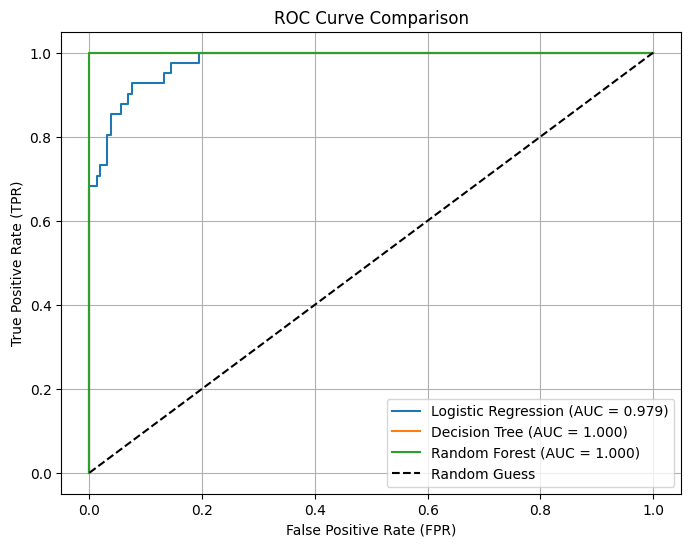

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assume y_test and predicted probabilities y_proba_lr, y_proba_dt, y_proba_rf exist

# Compute FPR and TPR for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

# Compute AUC values
auc_lr = roc_auc_score(y_test, y_proba_lr)
auc_dt = roc_auc_score(y_test, y_proba_dt)
auc_rf = roc_auc_score(y_test, y_proba_rf)

# Plot all ROC curves on one figure
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

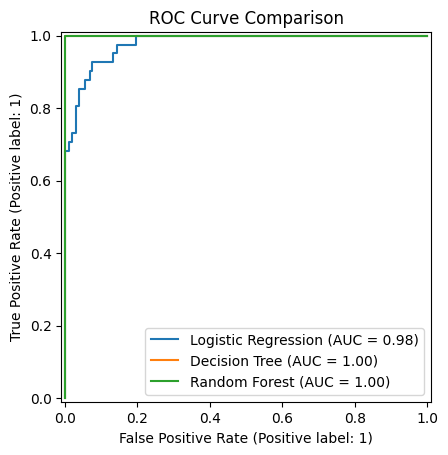

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Plot the first model
disp_lr = RocCurveDisplay.from_estimator(log_reg_model, X_test, y_test, name='Logistic Regression')
ax = disp_lr.ax_

# Overlay additional models
RocCurveDisplay.from_estimator(dt_model, X_test, y_test, name='Decision Tree', ax=ax)
RocCurveDisplay.from_estimator(rf_model, X_test, y_test, name='Random Forest', ax=ax)

ax.set_title('ROC Curve Comparison')
plt.show()


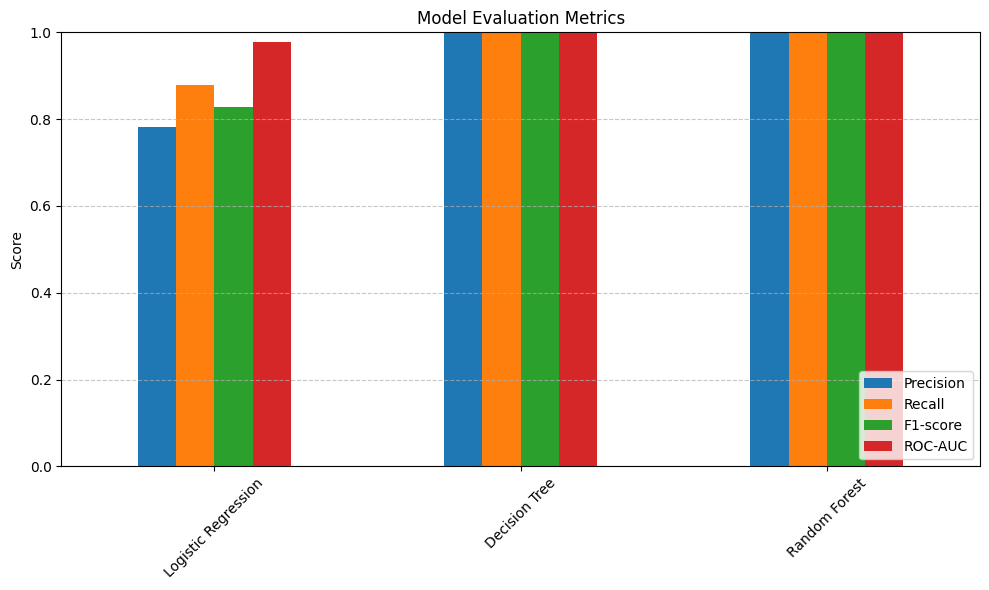

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd

# --- 6. Bar Plot for Metrics ---
# Create a DataFrame from the metrics dictionary
df_results = pd.DataFrame(metrics).T
df_results.plot(kind='bar', figsize=(10, 6))
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   A new binary target variable 'Creditworthy' was engineered based on 'Credit Utilization Ratio' and 'Payment History' because the original dataset lacked a target column for creditworthiness.
*   Categorical features were successfully one-hot encoded, and numerical features were scaled using `StandardScaler`.
*   The preprocessed data was split into training (80%) and testing (20%) sets.
*   Three classification models (Logistic Regression, Decision Tree, and Random Forest) were trained on the training data.
*   Model evaluation on the test set showed that the Decision Tree and Random Forest models achieved perfect scores (Precision, Recall, F1-score, ROC-AUC = 1.0000), while the Logistic Regression model also performed well but not perfectly.

### Insights or Next Steps

*   The perfect scores achieved by the Decision Tree and Random Forest models suggest potential overfitting or that the engineered target variable is too simple and easily separable based on the chosen features. Further investigation into the data and the definition of 'Creditworthy' is needed.
*   Consider using cross-validation during training to get a more robust estimate of model performance and explore more complex feature engineering or model architectures if needed.


**Y-DATA PRIOFILING**

In [ ]:
!pip install ydata-profiling


In [ ]:
from ydata_profiling import ProfileReport
prof = ProfileReport(credit_data)
prof.to_file(output_file='EDA.html')

from IPython.core.display import display, HTML
display(HTML(prof.to_html()))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 3/3 [00:00<00:00, 16.22it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]